<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Project - Early Diabetes Detection Using ML🚀</span>

# Youtube Video Link -->> https://youtu.be/l2WEjcAe3Hc

![](http://i.postimg.cc/bNJXLr3X/Screenshot-2025-02-16-161021.png)

<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 Importing Libraries</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [157]:
#Loading the dataset
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 Dataset Overview & Missing Values</span>


In [158]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [159]:
df.isnull().sum()
# It look's like no missing value but

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [160]:
df.describe().T

# There cannot be zero values medically so we have to replace(fill) them

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [161]:
# Checking for number of zeros in each column
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 Feature Distribution Visualization</span>


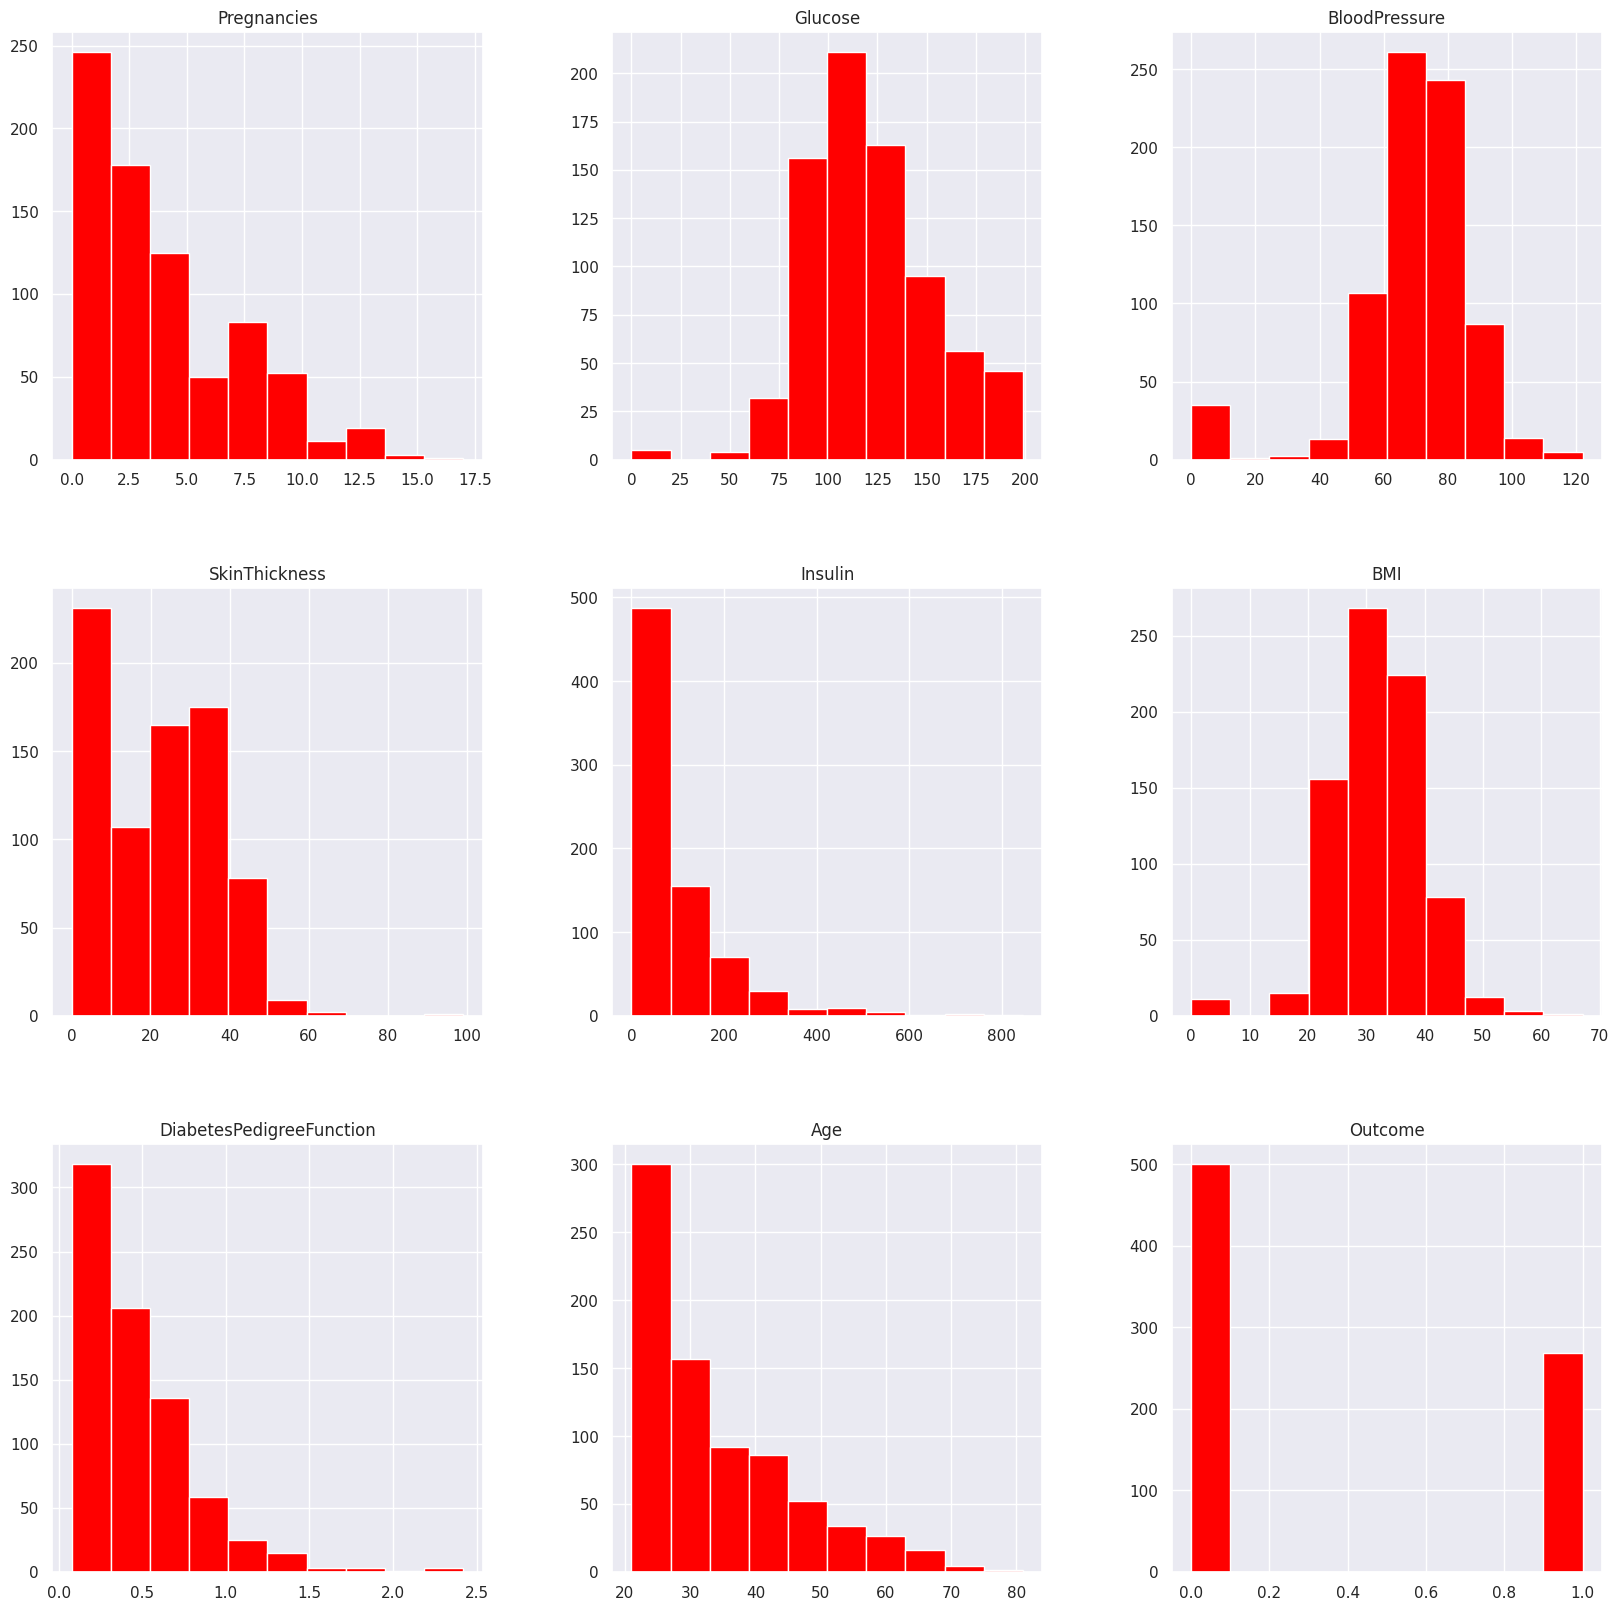

In [162]:
df.hist(color = 'red' , figsize = (20,20));


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 Handling Zero Values</span>


In [163]:
""" Some of the columns have a skewed distribution, so the mean is more affected by outliers than 
the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in 
those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median 
is a better choice as it is less affected by outliers. """

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [164]:
df.shape

(768, 9)

<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 Class Distribution of Outcome</span>


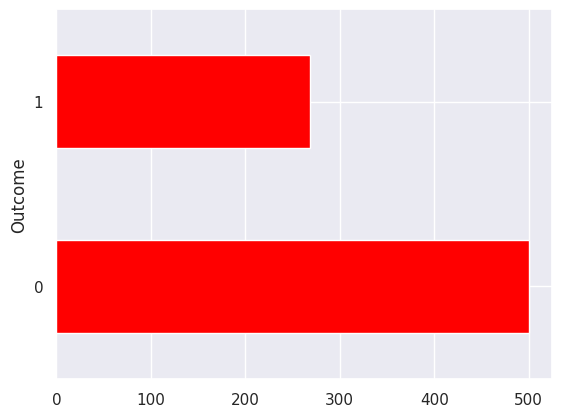

In [165]:
df['Outcome'].value_counts().plot(kind="barh" , color = 'red');

<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 KDE Plot for Blood Sugar Levels</span>



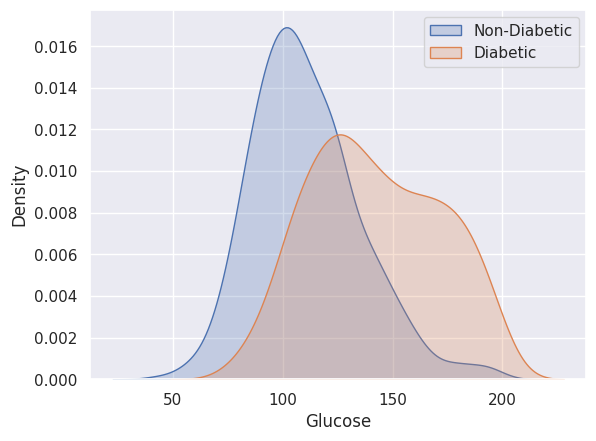

In [166]:
sns.kdeplot(df[df["Outcome"] == 0]["Glucose"], label="Non-Diabetic", shade=True)
sns.kdeplot(df[df["Outcome"] == 1]["Glucose"], label="Diabetic", shade=True)
plt.legend()
plt.show()

<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 Correlation Heatmap of Features</span>


<Axes: >

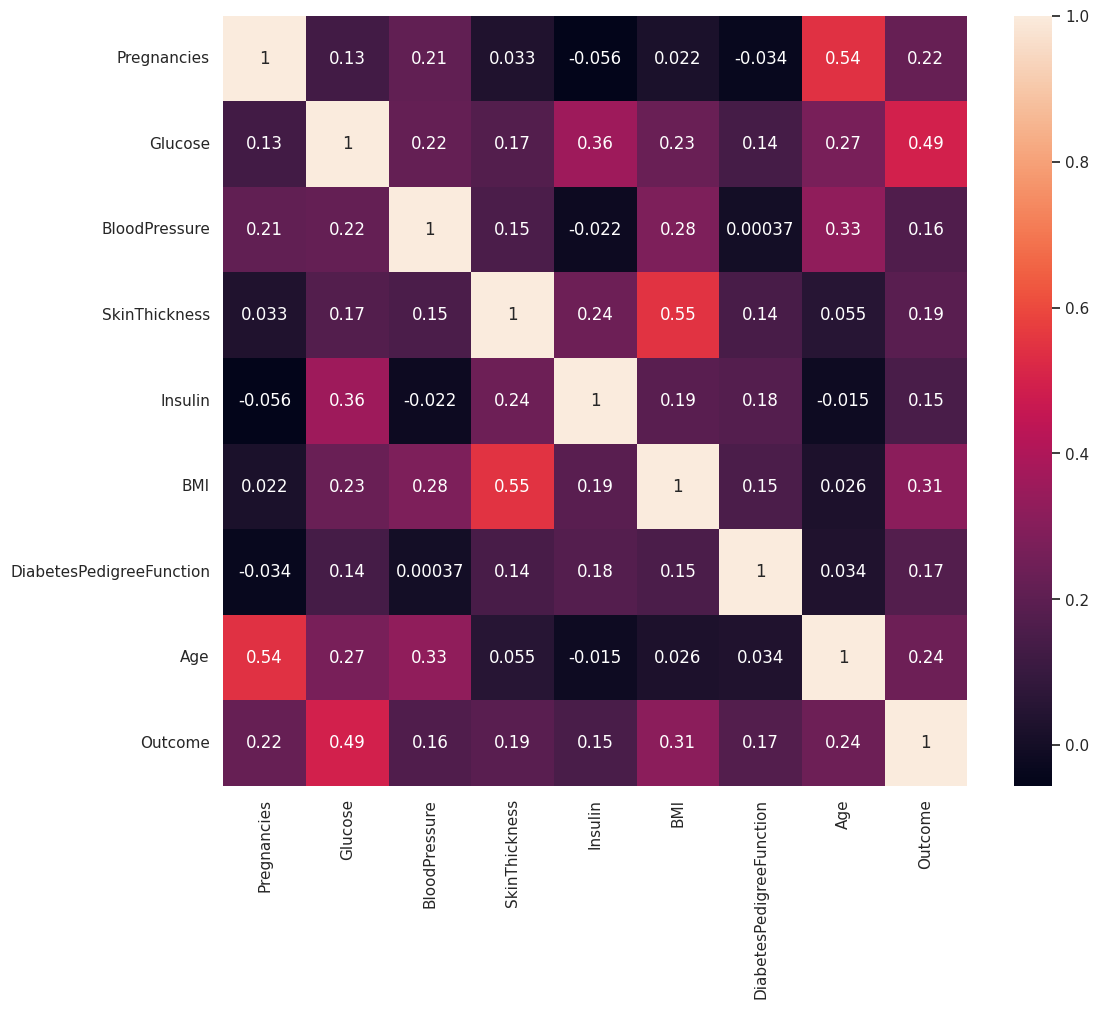

In [167]:
plt.figure(figsize=(12,10))  
sns.heatmap(df.corr(), annot=True ) 

<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 Feature Scaling with StandardScaler</span>


In [168]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(df.drop(columns=["Outcome"])), columns=df.columns[:-1])

In [169]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.831114,0.695378,1.549885,5.484909,-0.020496


In [170]:
y = df['Outcome']


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 Splitting Data into Train & Test Sets</span>


In [171]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [172]:
X_train.shape,X_test.shape

((614, 8), (154, 8))

<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 Logistic Regression Model Evaluation</span>


In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train)  # Predictions on training set
y_test_pred = log_reg.predict(X_test)    # Predictions on test set

# Accuracy Scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Set Accuracy:", train_acc * 100)
print("Test Set Accuracy:", test_acc * 100)

# Confusion Matrix & Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Train Set Accuracy: 79.47882736156352
Test Set Accuracy: 70.77922077922078
Confusion Matrix:
 [[82 18]
 [27 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 Random Forest Model with Hyperparameter Tuning</span>


In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200 , 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search with cross-validation
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Get best model
print("Best Params:", grid.best_params_)
rfc = grid.best_estimator_

# Predictions
y_train_pred = rfc.predict(X_train)  # Train set predictions
y_test_pred = rfc.predict(X_test)    # Test set predictions

# Accuracy Scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Set Accuracy:", train_acc * 100)
print("Test Set Accuracy:", test_acc * 100)

# Confusion Matrix & Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Train Set Accuracy: 100.0
Test Set Accuracy: 74.02597402597402
Confusion Matrix:
 [[82 18]
 [22 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       100
           1       0.64      0.59      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 SHAP Values for Feature Importance</span>



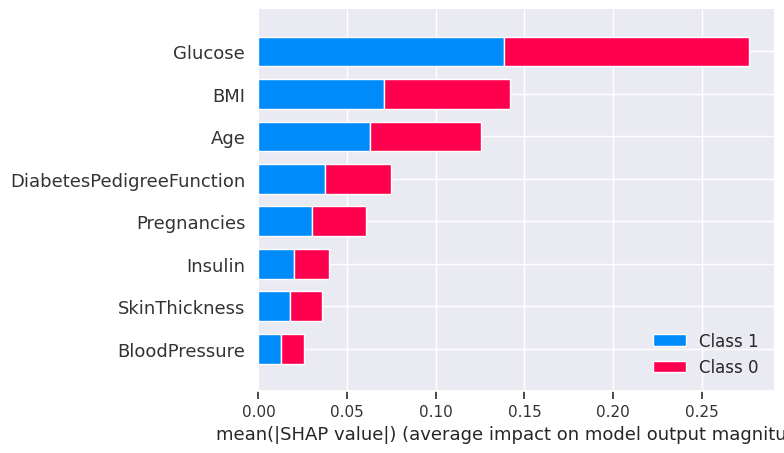

In [175]:
"""
The SHAP summary plot helps you understand how each feature in your dataset 
influences the predictions made by your RandomForestClassifier.

"""
import shap

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)



<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 Saving Model & Scaler with Pickle</span>

In [153]:
import pickle
pickle.dump(rfc, open('model.pkl' , 'wb'))
pickle.dump(ss, open('scaling.pkl' , 'wb'))
